In [71]:
# import modules
import glob
import numpy as np
import pandas
import pandas as pd
from astropy.time import Time
import datetime
from astropy.table import Table
import math
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from spacepy import pycdf
import datetime as dt
import warnings
import os
import matplotlib.dates as mdates

warnings.filterwarnings(action='once')
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})

In [3]:
df = pd.read_csv('../tables/v2/conjunctions_clean.csv')

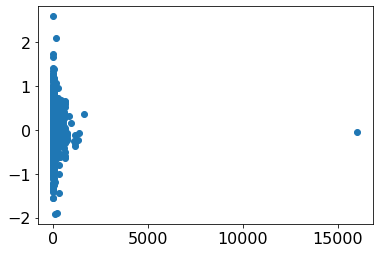

In [6]:
plt.scatter(df['n_profiles'],df['nel_diff'])

(0.0, 200.0)

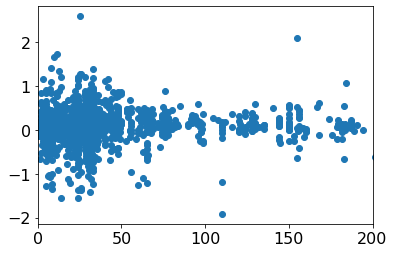

In [7]:
plt.scatter(df['n_profiles'],df['nel_diff'])
plt.xlim(0,200)

In [8]:
df = pd.read_csv('../tables/v2/conjunctions_clean_{mission}.csv'.format(mission='GF')).drop(['Unnamed: 0'], axis=1)
df['date'] = pd.to_datetime(df['date'])

In [9]:
len(df)

532

In [10]:
df[df['Location']=='Poker Flat']

,date,nel_radar,n_profiles,nel_gf,nel_diff,radar,radar_file,mission,radar_mnemonic,radar_mnemonic_unique,mission_unique,Latitude,Longitude,Location
0,2018-06-01 20:55:44.500,10.868284,28.0,10.847704,-0.020580,Poker Flat IS Radar,pfa180601.002_0.hdf5,GF,pfa,pfa,GF,65.13,-147.471,Poker Flat
1,2018-06-02 09:19:17.000,10.804335,486.0,10.813344,0.009008,Poker Flat IS Radar,pfa180602.002.hdf5,GF,pfa,pfa,GF,65.13,-147.471,Poker Flat
2,2018-06-02 20:34:22.000,10.977169,24.0,10.973143,-0.004026,Poker Flat IS Radar,pfa180602.002_0.hdf5,GF,pfa,pfa,GF,65.13,-147.471,Poker Flat
3,2018-06-03 08:57:52.000,10.869412,682.0,10.769161,-0.100251,Poker Flat IS Radar,pfa180603.003.hdf5,GF,pfa,pfa,GF,65.13,-147.471,Poker Flat
5,2018-06-07 20:21:54.500,10.912859,24.0,10.867291,-0.045568,Poker Flat IS Radar,pfa180606.002_0.hdf5,GF,pfa,pfa,GF,65.13,-147.471,Poker Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2020-12-03 12:31:39.500,10.297570,18.4,9.889089,-0.408481,"Poker Flat IS Radar , Poker Flat IS Radar , Po...","pfa201203.010.hdf5 , pfa201203.012.hdf5 , pfa2...","GF , GF , GF , GF , GF","pfa , pfa , pfa , pfa , pfa",pfa,GF,65.13,-147.471,Poker Flat
524,2020-12-07 00:15:39.500,10.784000,14.0,10.635015,-0.148985,"Poker Flat IS Radar , Poker Flat IS Radar , Po...","pfa201205.002.hdf5 , pfa201205.004.hdf5 , pfa2...","GF , GF , GF , GF","pfa , pfa , pfa , pfa",pfa,GF,65.13,-147.471,Poker Flat
525,2020-12-07 12:40:17.000,10.820616,145.0,10.526338,-0.294278,"Poker Flat IS Radar , Poker Flat IS Radar , Po...","pfa201205.002.hdf5 , pfa201205.004.hdf5 , pfa2...","GF , GF , GF , GF","pfa , pfa , pfa , pfa",pfa,GF,65.13,-147.471,Poker Flat
530,2020-12-22 23:10:19.500,10.328891,63.6,10.668783,0.339892,"Poker Flat IS Radar , Poker Flat IS Radar , Po...","pfa201222.012.hdf5 , pfa201222.014.hdf5 , pfa2...","GF , GF , GF , GF , GF","pfa , pfa , pfa , pfa , pfa",pfa,GF,65.13,-147.471,Poker Flat


In [11]:
383/532

0.7199248120300752

In [63]:
f107 = pd.read_csv('../data/external/f107/Kp_ap_Ap_SN_F107_since_1932.txt', delimiter=r"\s+", comment='#')
f107['date_simplified'] = f107.apply(lambda x: datetime.datetime(int(x['YYYY']), int(x['MM']), int(x['DD'])), axis=1)


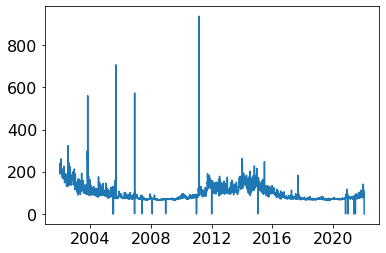

In [26]:
plt.plot(f107_plot['date_simplified'],f107_plot['F10.7obs'])

In [65]:
f107[f107['F10.7obs']>400]

,YYYY,MM,DD,days,days_m,Bsr,dB,Kp1,Kp2,Kp3,...,ap5,ap6,ap7,ap8,Ap,SN,F10.7obs,F10.7adj,D,date_simplified
5575,1947,4,7,5575,5575.5,1558,23,1.333,2.333,1.333,...,15,22,4,9,10,320,457.0,458.1,2,1947-04-07
5576,1947,4,8,5576,5576.5,1558,24,0.667,1.667,1.333,...,18,9,5,67,16,300,423.8,425.0,2,1947-04-08
25298,2001,4,6,25298,25298.5,2289,9,1.667,1.667,3.333,...,12,12,18,18,13,165,563.5,564.5,2,2001-04-06
25564,2001,12,28,25564,25564.5,2299,5,0.667,0.000,1.667,...,7,4,4,7,4,252,655.6,634.0,2,2001-12-28
26240,2003,11,4,26240,26240.5,2324,6,3.000,3.000,6.333,...,12,7,18,12,38,64,560.9,551.6,2,2003-11-04
26915,2005,9,9,26915,26915.5,2349,6,1.333,2.000,0.667,...,32,32,32,18,17,48,707.6,717.6,2,2005-09-09
27368,2006,12,6,27368,27368.5,2365,27,3.667,3.667,3.333,...,27,18,39,22,26,54,573.4,556.6,2,2006-12-06
28920,2011,3,7,28920,28920.5,2423,13,2.000,2.000,1.000,...,9,6,22,15,10,138,938.6,924.4,2,2011-03-07


In [17]:
f107_plot = f107[f107['date_simplified'] > datetime.datetime(2002,1,1)]

In [21]:
f107_plot.columns

Index(['YYYY', 'MM', 'DD', 'days', 'days_m', 'Bsr', 'dB', 'Kp1', 'Kp2', 'Kp3',
       'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8', 'ap1', 'ap2', 'ap3', 'ap4', 'ap5',
       'ap6', 'ap7', 'ap8', 'Ap', 'SN', 'F10.7obs', 'F10.7adj', 'D',
       'date_simplified'],
      dtype='object')

In [27]:
f107_plot

,YYYY,MM,DD,days,days_m,Bsr,dB,Kp1,Kp2,Kp3,...,ap5,ap6,ap7,ap8,Ap,SN,F10.7obs,F10.7adj,D,date_simplified
25569,2002,1,2,25569,25569.5,2299,10,2.000,0.667,1.000,...,12,12,9,7,8,218,231.1,223.5,2,2002-01-02
25570,2002,1,3,25570,25570.5,2299,11,1.000,0.667,0.667,...,2,3,0,0,2,220,220.3,213.0,2,2002-01-03
25571,2002,1,4,25571,25571.5,2299,12,0.667,1.000,0.333,...,3,3,3,3,3,230,218.2,211.0,2,2002-01-04
25572,2002,1,5,25572,25572.5,2299,13,1.000,1.333,0.333,...,2,2,2,0,2,191,212.2,205.2,2,2002-01-05
25573,2002,1,6,25573,25573.5,2299,14,0.333,0.000,0.000,...,4,5,2,4,2,159,196.6,190.1,2,2002-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32881,2022,1,9,32881,32881.5,2570,5,3.333,2.333,2.000,...,6,5,7,12,8,-1,102.1,98.7,0,2022-01-09
32882,2022,1,10,32882,32882.5,2570,6,2.667,2.000,0.333,...,4,6,9,6,6,-1,102.2,98.8,0,2022-01-10
32883,2022,1,11,32883,32883.5,2570,7,1.000,1.333,0.667,...,4,7,3,2,4,-1,100.0,96.7,0,2022-01-11
32884,2022,1,12,32884,32884.5,2570,8,0.333,1.000,0.000,...,3,3,3,4,2,-1,103.2,99.8,0,2022-01-12


In [67]:
f107 = pd.read_fwf('../data/external/f107/omni2_daily_bOKKAhnXtE.lst', names = ['year','day','hour','f10.7_index'])
f107['date_simplified'] = f107.apply(lambda x: datetime.datetime(int(x.year),1,1) + datetime.timedelta(int(x.day)-1), axis=1)
f107['f10.7_index'][f107['f10.7_index'] > 400] = np.nan

In [68]:
f107['date_simplified'] = f107.apply(lambda x: datetime.datetime(int(x.year),1,1) + datetime.timedelta(int(x.day)-1), axis=1)


In [69]:
f107['f10.7_index'][f107['f10.7_index'] > 400] = np.nan

/var/folders/3r/7zz2j67172q4gc7svtjlw_bc0000gn/T/ipykernel_44011/1156255316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f107['f10.7_index'][f107['f10.7_index'] > 400] = np.nan


/var/folders/3r/7zz2j67172q4gc7svtjlw_bc0000gn/T/ipykernel_44011/2900045377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f107['f10.7_index'][f107['f10.7_index'] > 400] = np.nan


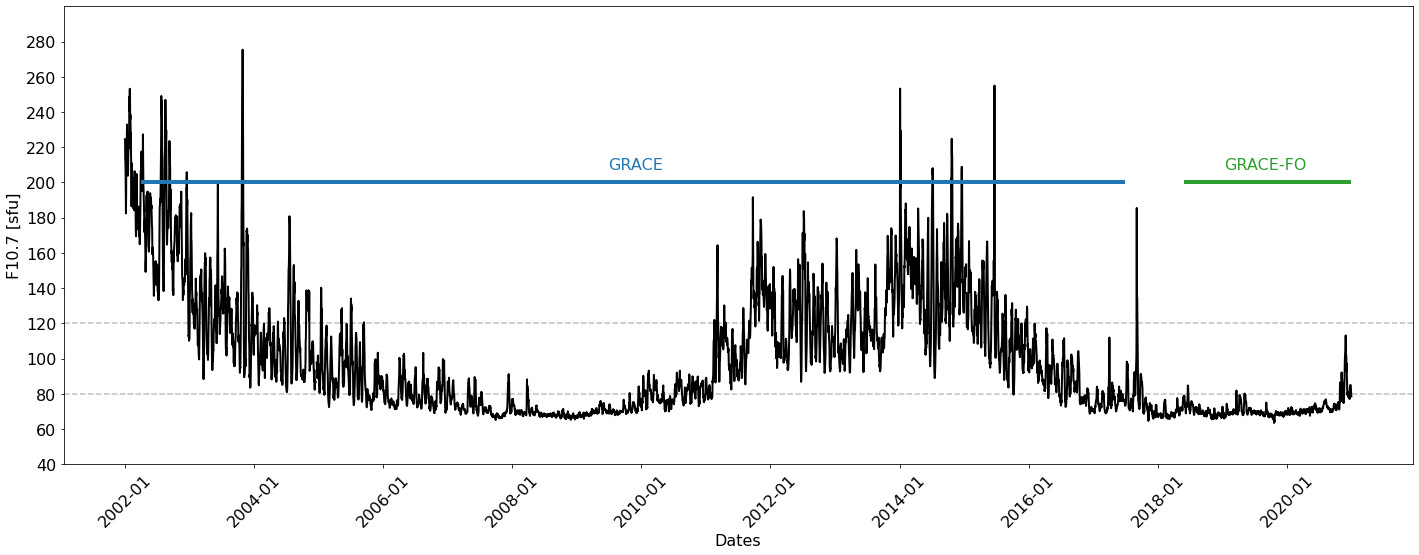

In [107]:
f107 = pd.read_fwf('../data/external/f107/omni2_daily_bOKKAhnXtE.lst', names = ['year','day','hour','f10.7_index'])
f107['date_simplified'] = f107.apply(lambda x: datetime.datetime(int(x.year),1,1) + datetime.timedelta(int(x.day)-1), axis=1)
f107['f10.7_index'][f107['f10.7_index'] > 400] = np.nan

fig, ax = plt.subplots(figsize=(20, 8))

plt.axhline(y=80, ls='dashed', alpha = 0.5, color ='gray')
plt.axhline(y=120, ls='dashed', alpha = 0.5, color ='gray')


plt.plot(f107['date_simplified'], f107['f10.7_index'], 'k', lw=2)

ax.hlines(y=200, xmin=datetime.datetime(2002,4,4), xmax=datetime.datetime(2017,6,29), linewidth=4, label = 'GRACE', color=plt.rcParams["axes.prop_cycle"].by_key()["color"][0])
ax.hlines(y=200, xmin=datetime.datetime(2018,5,29), xmax=datetime.datetime(2020,12,27), linewidth=4, label = 'GRACE-FO', color = plt.rcParams["axes.prop_cycle"].by_key()["color"][2])

plt.text(datetime.datetime(2009,12,1), 210,  'GRACE', ha='center', va='center', color = plt.rcParams["axes.prop_cycle"].by_key()["color"][0],fontsize=20)
plt.text(datetime.datetime(2019,9,1), 210,  'GRACE-FO', ha='center', va='center', color = plt.rcParams["axes.prop_cycle"].by_key()["color"][2],fontsize=20)


ax.xaxis_date()

# months = mdates.MonthLocator(interval=12)
# ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.ylim(40,300)
plt.yticks(np.arange(40,300,20))

plt.xlabel('Dates', fontsize=20)
plt.ylabel('F10.7 [sfu]', fontsize=20)

plt.tight_layout()


plt.savefig('../figures/v2/f107.png')

In [86]:
2018-2020

-2